In [2]:
from utils import *

In [3]:

# Main analysis
print("Loading course data...")
course_data = load_course_data()
print(f"Loaded data for years: {list(course_data.keys())}")


Loading course data...
Loaded data for years: ['2022', '2023', '2024', '2025']


Found 80 courses for 2024
Loading student preferences...
Loaded preferences from sheet: 2024
Loaded preferences data with shape: (297, 31)


c:\src\personal_projects\discover_analysis\utils.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='name', data=top_courses, ax=ax1, palette='viridis')
c:\src\personal_projects\discover_analysis\utils.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='name', data=bottom_courses, ax=ax2, palette='viridis')


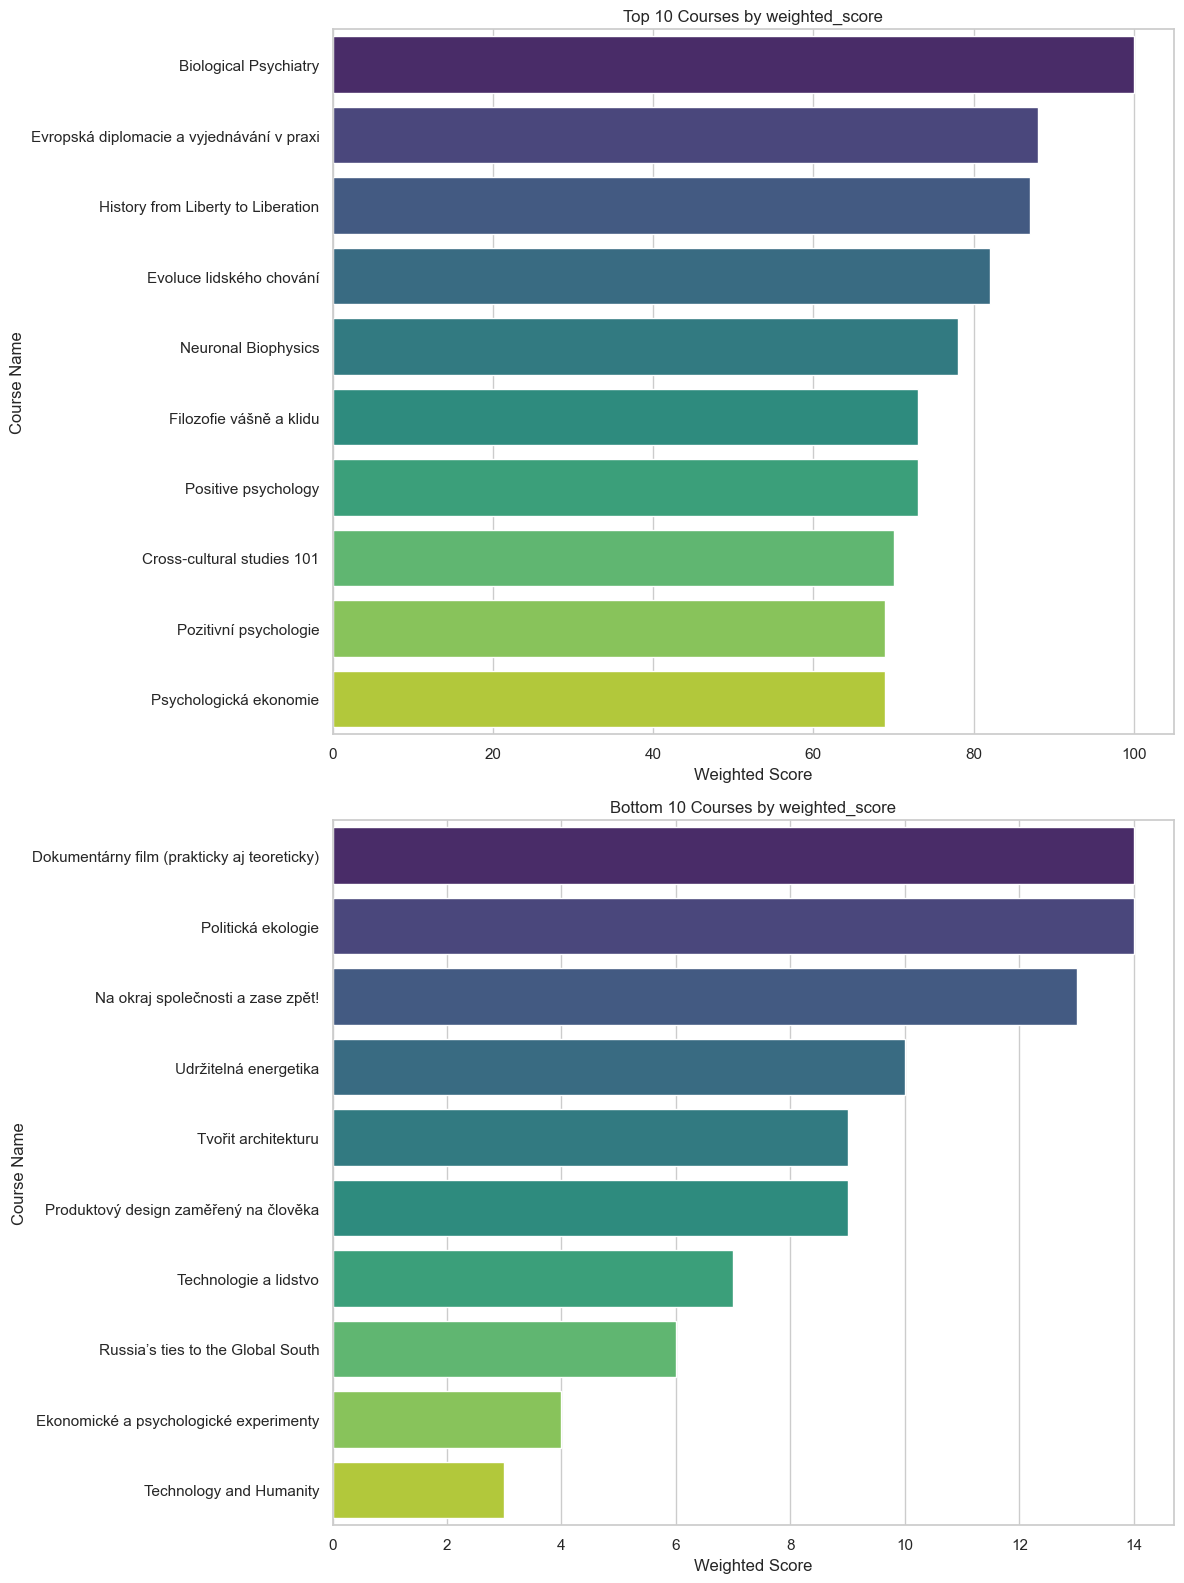

Popularity data saved to data\course_popularity_analysis_2024.csv


In [ ]:
year = '2025'
courses_year = course_data.get(year)

if courses_year is not None:
    print(f"Found {len(courses_year)} courses for {year}")

    # Now load preferences
    print("Loading student preferences...")
    preferences_df = load_student_preferences(year)
    print(f"Loaded preferences data with shape: {preferences_df.shape}")
    # display(preferences_df.head())
    popularity_df = analyze_course_popularity(preferences_df, courses_year)

    plot_course_popularity(popularity_df)

    save_popularity_data(popularity_df, year, 'data')
else:
    print(f"No data found for year {year}")
  